# Campnet

## Importing data and installing the igraph package

We are going to use the igraph package in R. We use the campnet dataset discussed in Borgatti Dataset(`campnet.txt`) and attribute file (`campattr.txt`) are available from canvas.
For more information on the data, see: https://sites.google.com/site/ucinetsoftware/datasets/campdata

In [1]:
# First we need to install the igraph package
# install.packages("igraph")
library(igraph)


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union




Now import the campnet data and attribute files. Be sure that the two files are in your R working directory. 

The format of the network data is called an edgelist.

`header = False` since we don't have a name to the two columns

The attribute file contains information on the nodes such as their gender, their role. It also already includes a centrality measure (betweenness) but this will be calculated separately later on in the script. 

In [2]:
# Import the campnet data
campnet <- read.csv("data/campnet.txt", header=FALSE)
# Import the attribute file
campattr <- read.csv("data/campattr.txt")

In [3]:
# Look at the format (should be a dataframe).
class(campnet)

[1] "data.frame"

In [4]:
# Look at the first rows of the file
head(campnet)

,V1,V2
,<chr>,<chr>
1,HOLLY,PAM
2,HOLLY,PAT
3,HOLLY,DON
4,BRAZEY,LEE
5,BRAZEY,STEVE
6,BRAZEY,BERT


In [5]:
head(campattr)

,Node,Gender,Role,Betweenness
,<chr>,<int>,<int>,<int>
1,HOLLY,1,1,78
2,BRAZEY,1,1,0
3,CAROL,1,1,1
4,PAM,1,1,33
5,PAT,1,1,40
6,JENNIE,1,1,6


We need to transform the data frame format into an igraph object to be able to use igraph's functions. In this step we also already add the attributes to the vertices as this is a directed network we set directed to `TRUE`

In [6]:
g <- graph_from_data_frame(campnet, directed = TRUE, vertices = campattr)
# look at the file format
class(g)

[1] "igraph"

In [7]:
# now has become an igraph format
# look at the first rows
head(g)

   [[ suppressing 18 column names ‘HOLLY’, ‘BRAZEY’, ‘CAROL’ ... ]]



6 x 18 sparse Matrix of class "dgCMatrix"
                                          
HOLLY  . . . 1 1 . . . . . . 1 . . . . . .
BRAZEY . . . . . . . . . . 1 . . . . 1 1 .
CAROL  . . . 1 1 . 1 . . . . . . . . . . .
PAM    . . . . . 1 1 1 . . . . . . . . . .
PAT    1 . 1 . . 1 . . . . . . . . . . . .
JENNIE . . . 1 1 . . 1 . . . . . . . . . .

In [8]:
# if you print out the g object it lists the edges.
g

IGRAPH 0832fb7 DN-- 18 54 -- 
+ attr: name (v/c), Gender (v/n), Role (v/n), Betweenness (v/n)
+ edges from 0832fb7 (vertex names):
 [1] HOLLY  ->PAM     HOLLY  ->PAT     HOLLY  ->DON     BRAZEY ->LEE    
 [5] BRAZEY ->STEVE   BRAZEY ->BERT    CAROL  ->PAM     CAROL  ->PAT    
 [9] CAROL  ->PAULINE PAM    ->JENNIE  PAM    ->PAULINE PAM    ->ANN    
[13] PAT    ->HOLLY   PAT    ->CAROL   PAT    ->JENNIE  JENNIE ->PAM    
[17] JENNIE ->PAT     JENNIE ->ANN     PAULINE->CAROL   PAULINE->PAM    
[21] PAULINE->PAT     ANN    ->PAM     ANN    ->JENNIE  ANN    ->PAULINE
[25] MICHAEL->HOLLY   MICHAEL->DON     MICHAEL->HARRY   BILL   ->MICHAEL
[29] BILL   ->DON     BILL   ->HARRY   LEE    ->BRAZEY  LEE    ->STEVE  
+ ... omitted several edges

In [9]:
#you can also access the matrix using
g[]

   [[ suppressing 18 column names ‘HOLLY’, ‘BRAZEY’, ‘CAROL’ ... ]]



18 x 18 sparse Matrix of class "dgCMatrix"
                                           
HOLLY   . . . 1 1 . . . . . . 1 . . . . . .
BRAZEY  . . . . . . . . . . 1 . . . . 1 1 .
CAROL   . . . 1 1 . 1 . . . . . . . . . . .
PAM     . . . . . 1 1 1 . . . . . . . . . .
PAT     1 . 1 . . 1 . . . . . . . . . . . .
JENNIE  . . . 1 1 . . 1 . . . . . . . . . .
PAULINE . . 1 1 1 . . . . . . . . . . . . .
ANN     . . . 1 . 1 1 . . . . . . . . . . .
MICHAEL 1 . . . . . . . . . . 1 . 1 . . . .
BILL    . . . . . . . . 1 . . 1 . 1 . . . .
LEE     . 1 . . . . . . . . . . . . . 1 1 .
DON     1 . . . . . . . 1 . . . . 1 . . . .
JOHN    . . . . . . 1 . . . . . . . 1 . . 1
HARRY   1 . . . . . . . 1 . . 1 . . . . . .
GERY    . . . . . . . . 1 . . . . . . 1 . 1
STEVE   . . . . . . . . . . 1 . . . . . 1 1
BERT    . . . . . . . . . . 1 . . . . 1 . 1
RUSS    . . . . . . . . . . . . . . 1 1 1 .

In [10]:
# we can count the number of nodes
vcount(g)

[1] 18

In [11]:
# and count the number of edges
ecount(g)

[1] 54

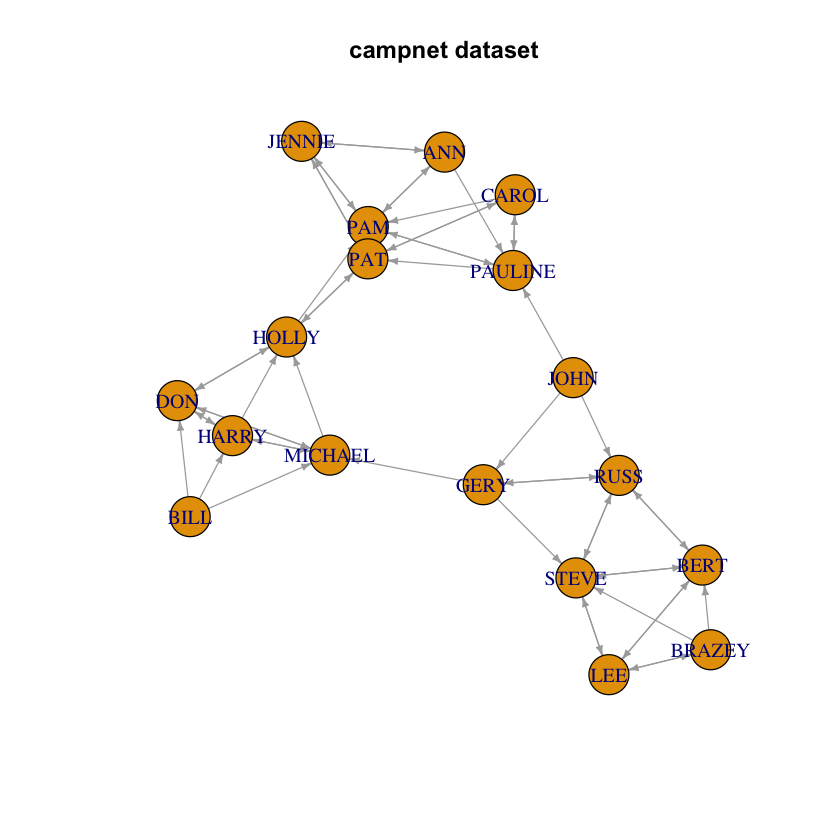

In [12]:
# We can plot the network with the `kamada-kawai` layout. 
# We replicate the figure 2.3 in borgatti which shows the directed network in graph format
plot(g, 
     edge.arrow.size = .4 ,
     layout = layout_with_kk, 
     main = "campnet dataset")

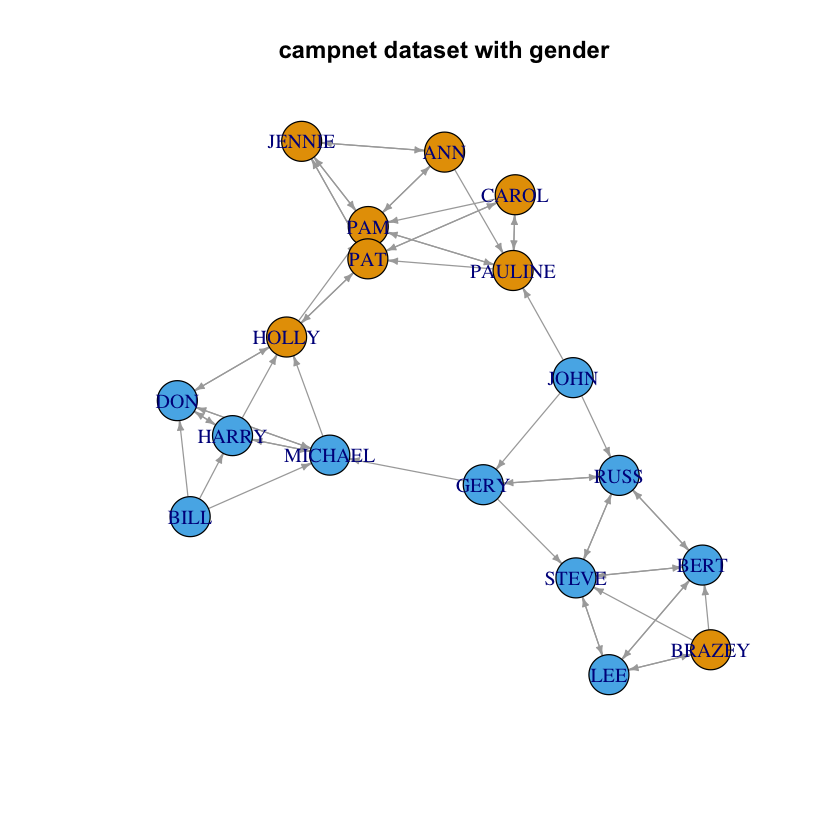

In [13]:
# Replicate figure 9.3 with gender attribute
plot(g, 
     edge.arrow.size = .4, 
     layout = layout_with_kk, 
     main = "campnet dataset with gender", 
     vertex.color = vertex_attr(g)$Gender)

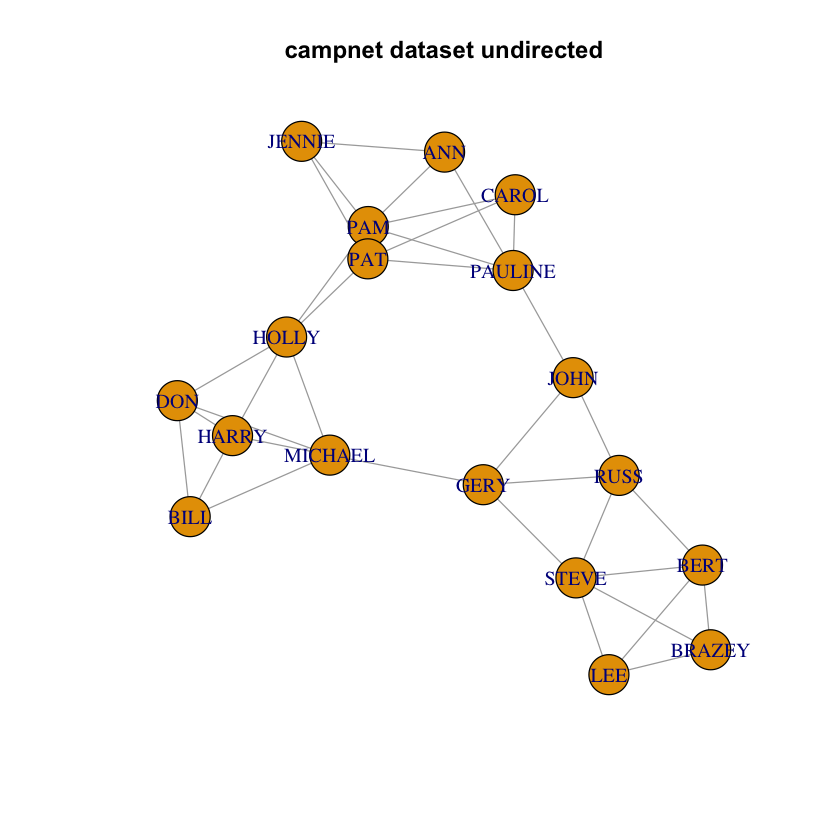

In [14]:
# Change into an undirected network by collapsing
g_undirected <- as.undirected(g, mode = "collapse")
plot(g_undirected, 
     edge.arrow.size = .4, 
     layout = layout_with_kk,
     main = "campnet dataset undirected")

In [15]:
# If you look at the matrix representation you see that it has become symmetric
g_undirected[]

#all_simple_paths(g, "HOLLY", to = V(g), mode = c("out"))

   [[ suppressing 18 column names ‘HOLLY’, ‘BRAZEY’, ‘CAROL’ ... ]]



18 x 18 sparse Matrix of class "dgCMatrix"
                                           
HOLLY   . . . 1 1 . . . 1 . . 1 . 1 . . . .
BRAZEY  . . . . . . . . . . 1 . . . . 1 1 .
CAROL   . . . 1 1 . 1 . . . . . . . . . . .
PAM     1 . 1 . . 1 1 1 . . . . . . . . . .
PAT     1 . 1 . . 1 1 . . . . . . . . . . .
JENNIE  . . . 1 1 . . 1 . . . . . . . . . .
PAULINE . . 1 1 1 . . 1 . . . . 1 . . . . .
ANN     . . . 1 . 1 1 . . . . . . . . . . .
MICHAEL 1 . . . . . . . . 1 . 1 . 1 1 . . .
BILL    . . . . . . . . 1 . . 1 . 1 . . . .
LEE     . 1 . . . . . . . . . . . . . 1 1 .
DON     1 . . . . . . . 1 1 . . . 1 . . . .
JOHN    . . . . . . 1 . . . . . . . 1 . . 1
HARRY   1 . . . . . . . 1 1 . 1 . . . . . .
GERY    . . . . . . . . 1 . . . 1 . . 1 . 1
STEVE   . 1 . . . . . . . . 1 . . . 1 . 1 1
BERT    . 1 . . . . . . . . 1 . . . . 1 . 1
RUSS    . . . . . . . . . . . . 1 . 1 1 1 .

In [16]:
# Get distances between nodes. matrix 2.2 in borgatti. 
# We take the directed graph and therefore add mode=out and mode=in
distances(g, mode = "out")
distances(g, mode = "in")

,HOLLY,BRAZEY,CAROL,PAM,PAT,JENNIE,PAULINE,ANN,MICHAEL,BILL,LEE,DON,JOHN,HARRY,GERY,STEVE,BERT,RUSS
HOLLY,0,Inf,2,1,1,2,2,2,2,Inf,Inf,1,Inf,2,Inf,Inf,Inf,Inf
BRAZEY,5,0,7,6,6,7,7,7,4,Inf,1,5,Inf,5,3,1,1,2
CAROL,2,Inf,0,1,1,2,1,2,4,Inf,Inf,3,Inf,4,Inf,Inf,Inf,Inf
PAM,3,Inf,2,0,2,1,1,1,5,Inf,Inf,4,Inf,5,Inf,Inf,Inf,Inf
PAT,1,Inf,1,2,0,1,2,2,3,Inf,Inf,2,Inf,3,Inf,Inf,Inf,Inf
JENNIE,2,Inf,2,1,1,0,2,1,4,Inf,Inf,3,Inf,4,Inf,Inf,Inf,Inf
PAULINE,2,Inf,1,1,1,2,0,2,4,Inf,Inf,3,Inf,4,Inf,Inf,Inf,Inf
ANN,3,Inf,2,1,2,1,1,0,5,Inf,Inf,4,Inf,5,Inf,Inf,Inf,Inf
MICHAEL,1,Inf,3,2,2,3,3,3,0,Inf,Inf,1,Inf,1,Inf,Inf,Inf,Inf
BILL,2,Inf,4,3,3,4,4,4,1,0,Inf,1,Inf,1,Inf,Inf,Inf,Inf


,HOLLY,BRAZEY,CAROL,PAM,PAT,JENNIE,PAULINE,ANN,MICHAEL,BILL,LEE,DON,JOHN,HARRY,GERY,STEVE,BERT,RUSS
HOLLY,0,5,2,3,1,2,2,3,1,2,5,1,3,1,2,4,4,3
BRAZEY,Inf,0,Inf,Inf,Inf,Inf,Inf,Inf,Inf,Inf,1,Inf,4,Inf,3,2,2,3
CAROL,2,7,0,2,1,2,1,2,3,4,7,3,2,3,4,6,6,5
PAM,1,6,1,0,2,1,1,1,2,3,6,2,2,2,3,5,5,4
PAT,1,6,1,2,0,1,1,2,2,3,6,2,2,2,3,5,5,4
JENNIE,2,7,2,1,1,0,2,1,3,4,7,3,3,3,4,6,6,5
PAULINE,2,7,1,1,2,2,0,1,3,4,7,3,1,3,4,6,6,5
ANN,2,7,2,1,2,1,2,0,3,4,7,3,3,3,4,6,6,5
MICHAEL,2,4,4,5,3,4,4,5,0,1,4,1,2,1,1,3,3,2
BILL,Inf,Inf,Inf,Inf,Inf,Inf,Inf,Inf,Inf,0,Inf,Inf,Inf,Inf,Inf,Inf,Inf,Inf


In [17]:
# find the number of strong components. strong components take direction into account
g.components <- components(g, mode = c("strong"))
print(g.components)

$membership
  HOLLY  BRAZEY   CAROL     PAM     PAT  JENNIE PAULINE     ANN MICHAEL    BILL 
      4       3       4       4       4       4       4       4       4       2 
    LEE     DON    JOHN   HARRY    GERY   STEVE    BERT    RUSS 
      3       4       1       4       3       3       3       3 

$csize
[1]  1  1  6 10

$no
[1] 4



In [18]:
# the following line does the same thing but now just returns the number
count_components(g, mode = c("strong"))

[1] 4

In [19]:
# add attributes of component membership
V(g)$components <- g.components$membership

In [20]:
# Examine attributes to check if it was added
vertex_attr(g)

$name
 [1] "HOLLY"   "BRAZEY"  "CAROL"   "PAM"     "PAT"     "JENNIE"  "PAULINE"
 [8] "ANN"     "MICHAEL" "BILL"    "LEE"     "DON"     "JOHN"    "HARRY"  
[15] "GERY"    "STEVE"   "BERT"    "RUSS"   

$Gender
 [1] 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2

$Role
 [1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2

$Betweenness
 [1] 78  0  1 33 40  6 13  1 59  0  5 16  0  2 55 17 14 47

$components
 [1] 4 3 4 4 4 4 4 4 4 2 3 4 1 4 3 3 3 3

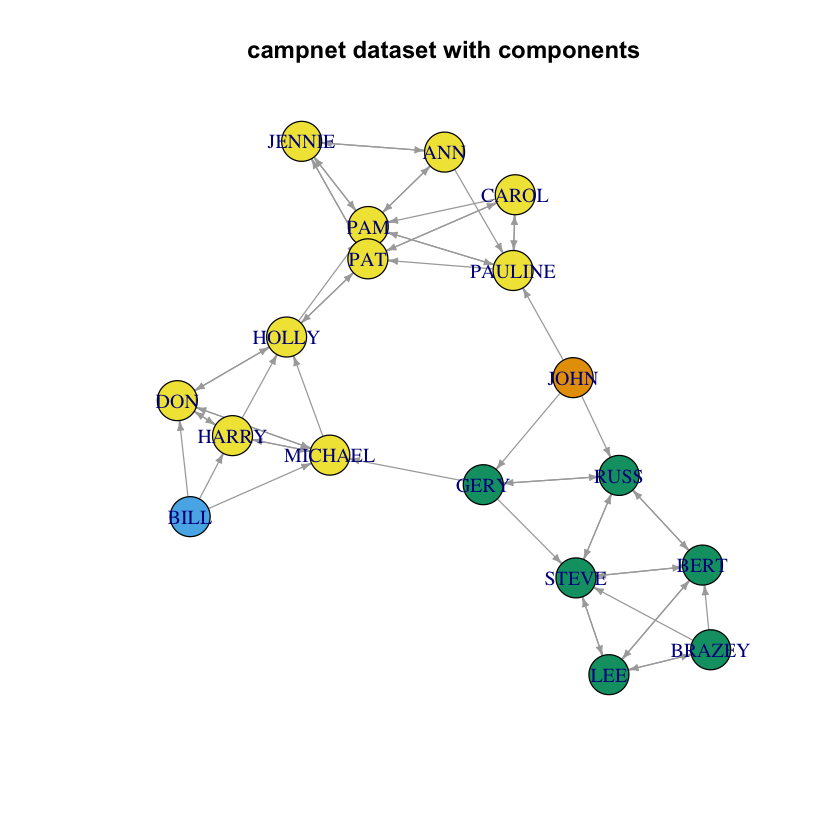

In [21]:
#plot the graph with components
plot(g,
     edge.arrow.size = .4,
     layout = layout_with_kk,
     main = "campnet dataset with components",
     vertex.color = vertex_attr(g)$components)

To illustrate the discussion of matrix multiplication in 2.6 of Borgatti et al., we need to transform the igraph object back to a matrix object.

This next line converts the igraph object to a regular matrix.

In [22]:
g_matrix <- get.adjacency(g_undirected, sparse = FALSE)

In [23]:
class(g_matrix)

[1] "matrix" "array"

In [24]:
print(g_matrix)

        HOLLY BRAZEY CAROL PAM PAT JENNIE PAULINE ANN MICHAEL BILL LEE DON JOHN
HOLLY       0      0     0   1   1      0       0   0       1    0   0   1    0
BRAZEY      0      0     0   0   0      0       0   0       0    0   1   0    0
CAROL       0      0     0   1   1      0       1   0       0    0   0   0    0
PAM         1      0     1   0   0      1       1   1       0    0   0   0    0
PAT         1      0     1   0   0      1       1   0       0    0   0   0    0
JENNIE      0      0     0   1   1      0       0   1       0    0   0   0    0
PAULINE     0      0     1   1   1      0       0   1       0    0   0   0    1
ANN         0      0     0   1   0      1       1   0       0    0   0   0    0
MICHAEL     1      0     0   0   0      0       0   0       0    1   0   1    0
BILL        0      0     0   0   0      0       0   0       1    0   0   1    0
LEE         0      1     0   0   0      0       0   0       0    0   0   0    0
DON         1      0     0   0   0      

In [25]:
# matrix multiplication by itself to get number of walks of length 2 between i and j
g_matrix%*%g_matrix

,HOLLY,BRAZEY,CAROL,PAM,PAT,JENNIE,PAULINE,ANN,MICHAEL,BILL,LEE,DON,JOHN,HARRY,GERY,STEVE,BERT,RUSS
HOLLY,5,0,2,0,0,2,2,1,2,3,0,2,0,2,1,0,0,0
BRAZEY,0,3,0,0,0,0,0,0,0,0,2,0,0,0,1,2,2,2
CAROL,2,0,3,1,1,2,2,2,0,0,0,0,1,0,0,0,0,0
PAM,0,0,1,5,4,1,2,2,1,0,0,1,1,1,0,0,0,0
PAT,0,0,1,4,4,0,1,2,1,0,0,1,1,1,0,0,0,0
JENNIE,2,0,2,1,0,3,3,1,0,0,0,0,0,0,0,0,0,0
PAULINE,2,0,2,2,1,3,5,1,0,0,0,0,0,0,1,0,0,1
ANN,1,0,2,2,2,1,1,3,0,0,0,0,1,0,0,0,0,0
MICHAEL,2,0,0,1,1,0,0,0,5,2,0,3,1,3,0,1,0,1
BILL,3,0,0,0,0,0,0,0,2,3,0,2,0,2,1,0,0,0


In [26]:
# matrix multiplication to third power to get number of walks of length 3 between i and j
g_matrix%*%g_matrix%*%g_matrix

In [26]:
g_matrix%*%g_matrix%*%g_matrix%*%g_matrix

,HOLLY,BRAZEY,CAROL,PAM,PAT,JENNIE,PAULINE,ANN,MICHAEL,BILL,LEE,DON,JOHN,HARRY,GERY,STEVE,BERT,RUSS
HOLLY,6,0,2,12,11,1,3,4,13,6,0,12,3,12,2,1,0,1
BRAZEY,0,6,0,0,0,0,0,0,1,0,7,0,3,0,4,10,9,5
CAROL,2,0,4,11,9,4,8,5,2,0,0,2,2,2,1,0,0,1
PAM,12,0,11,6,4,11,13,8,2,3,0,2,2,2,2,0,0,1
PAT,11,0,9,4,2,10,12,5,2,3,0,2,1,2,2,0,0,1
JENNIE,1,0,4,11,10,2,4,7,2,0,0,2,3,2,0,0,0,0
PAULINE,3,0,8,13,12,4,6,10,3,0,0,2,7,2,1,2,1,1
ANN,4,0,5,8,5,7,10,4,1,0,0,1,1,1,1,0,0,1
MICHAEL,13,1,2,2,2,2,3,1,10,11,1,12,1,12,8,1,2,2
BILL,6,0,0,3,3,0,0,0,11,6,0,10,1,10,2,1,0,1


,HOLLY,BRAZEY,CAROL,PAM,PAT,JENNIE,PAULINE,ANN,MICHAEL,BILL,LEE,DON,JOHN,HARRY,GERY,STEVE,BERT,RUSS
HOLLY,60,1,26,16,12,27,32,16,38,37,1,37,6,37,18,3,2,6
BRAZEY,1,26,0,0,0,0,3,0,4,1,25,1,9,1,19,31,28,26
CAROL,26,0,28,23,18,25,31,23,7,6,0,6,10,6,5,2,1,3
PAM,16,0,23,55,47,18,31,30,21,6,0,19,16,19,5,3,1,4
PAT,12,0,18,47,42,11,21,26,20,6,0,18,15,18,4,3,1,3
JENNIE,27,0,25,18,11,28,35,17,5,6,0,5,4,5,5,0,0,3
PAULINE,32,3,31,31,21,35,50,23,8,7,3,8,8,8,13,3,3,11
ANN,16,0,23,30,26,17,23,25,7,3,0,6,12,6,3,2,1,2
MICHAEL,38,4,7,21,20,5,8,7,56,34,4,46,13,46,14,14,5,12
BILL,37,1,6,6,6,6,7,3,34,31,1,33,3,33,14,3,2,4


## Whole Network Measures

In [27]:
# measure the density. 
graph.density(g)

In [27]:
graph.density(g_undirected)

[1] 0.1764706

[1] 0.2287582

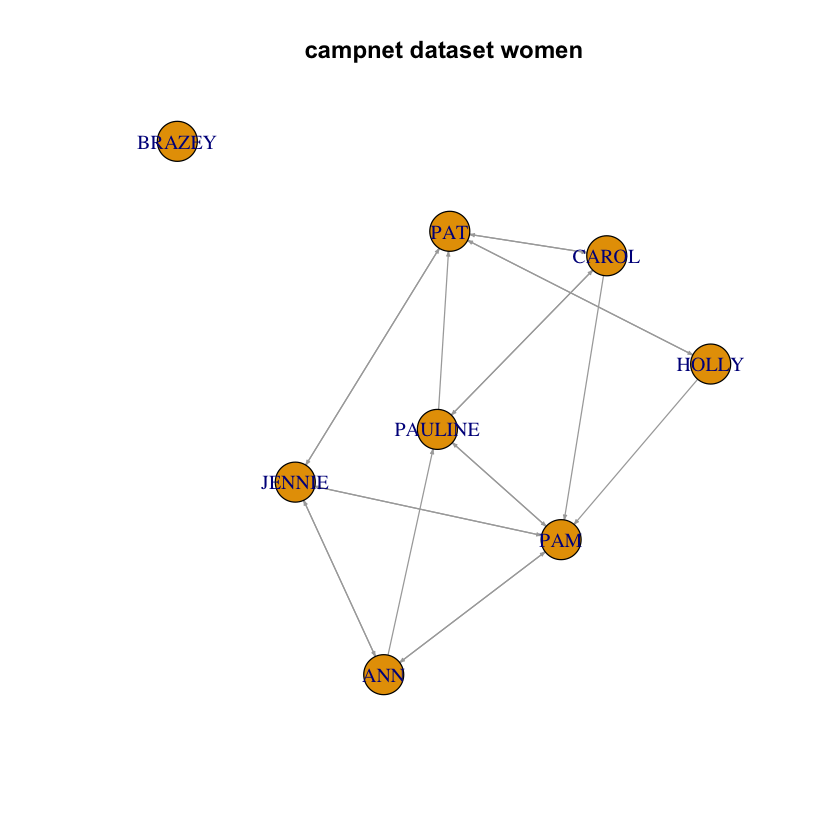

In [28]:
# Find density in subgroups:
# extract the womens network
g.women <- induced_subgraph(g, V(g)$Gender == 1)
# we can also plot only the women in the network
plot(g.women,
     edge.arrow.size = .2,
     layout = layout_with_kk,
     main = "campnet dataset women",
     vertex.color = vertex_attr(g.women)$Gender)

In [29]:
# Density among women. should be 0.357.
graph.density(g.women)

[1] 0.3571429

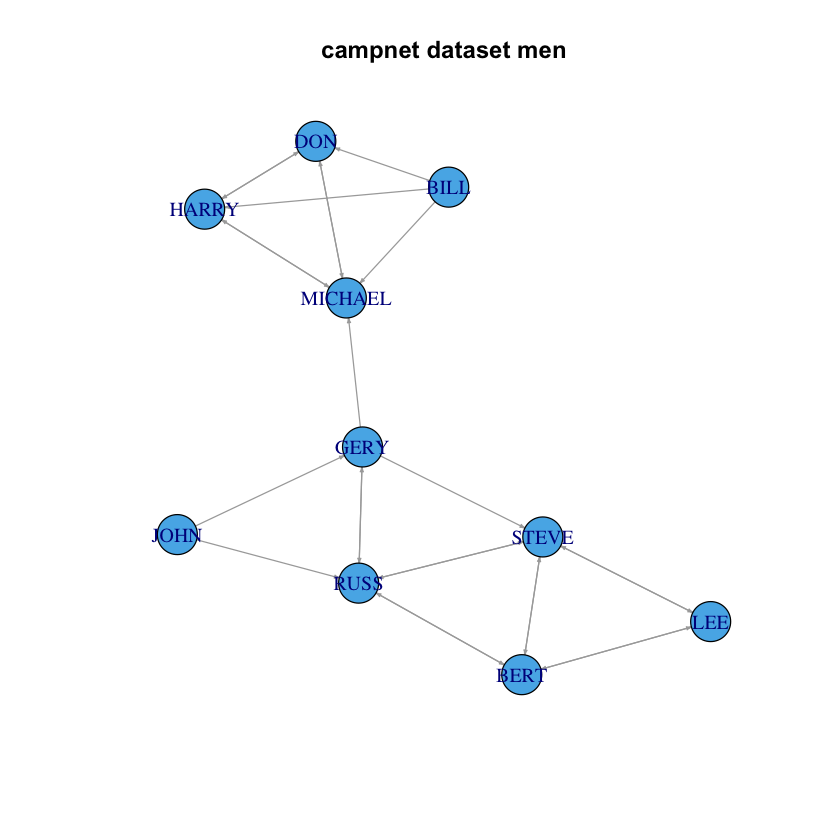

In [30]:
# Density among men. should be 0.278.
g.men <- induced_subgraph(g, V(g)$Gender == 2)
plot(g.men,
     edge.arrow.size = .2,
     layout = layout_with_kk,
     main = "campnet dataset men",
     vertex.color = vertex_attr(g.men)$Gender)

In [31]:
graph.density(g.men)

[1] 0.2777778

## Compactness

Compactness is not available in igraph, but we can calculate it by defining a function

In [32]:
Compactness <- function(x) {
  gra.geo <- distances(x) ## get geodesics
  gra.rdist <- 1/gra.geo  ## get reciprocal of geodesics
  diag(gra.rdist) <- NA   ## assign NA to diagonal
  gra.rdist[gra.rdist == Inf] <- 0 ## replace infinity with 0
  # Compactness = mean of reciprocal distances
  comp.igph <- mean(gra.rdist, na.rm=TRUE) 
  return(comp.igph)
}
Compactness(g)

[1] 0.4989107

In [33]:
reciprocity(g, ignore.loops = TRUE, mode = "ratio")

[1] 0.5428571

In [34]:
# Transitivity 
# overall graph clustering coefficient
transitivity(g, type = 'average')

In [34]:
# This is the weighted overall clustering coefficient on the undirected network, 
# which is the same as the 9.4 formula in Borgatti, but for undirected networks. 
transitivity(g)

[1] 0.5685185

[1] 0.5046729

## Centralization

Calculations for the example from figure 9.8 in Borgatti

In [35]:
C = matrix(c(0,1,1,0,0,1,0,1,0,0,1,1,0,1,1,0,0,1,0,1,0,0,1,1,0), nrow = 5, ncol = 5) 
print(C)

     [,1] [,2] [,3] [,4] [,5]
[1,]    0    1    1    0    0
[2,]    1    0    1    0    0
[3,]    1    1    0    1    1
[4,]    0    0    1    0    1
[5,]    0    0    1    1    0


In [36]:
c <- graph_from_adjacency_matrix(C, mode = "undirected")
plot(c)

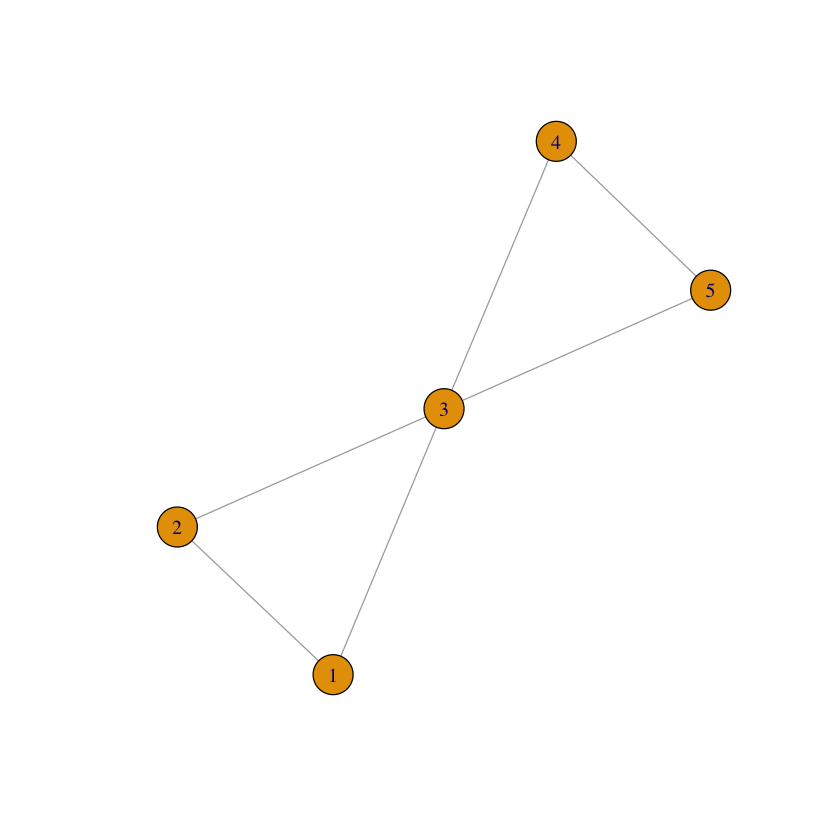

In [58]:
degree(c)

[1] 2 2 4 2 2

In [59]:
centr_degree(c, mode = "all", loops = FALSE, normalized = TRUE)

$res
[1] 2 2 4 2 2

$centralization
[1] 0.6666667

$theoretical_max
[1] 12

In [39]:
# applied to campnet data
centr_degree(g_undirected, loops = FALSE, normalized = TRUE)

$res
 [1] 5 3 3 5 4 3 5 3 5 3 3 4 3 4 4 5 4 4

$centralization
[1] 0.07352941

$theoretical_max
[1] 272

In [40]:
# Diameter
diameter(g)

[1] 7

## Centrality Measures

We do all the below calculations for the undirected network

In [41]:
# Degree centrality
deg <- degree(g_undirected)
print(deg)

  HOLLY  BRAZEY   CAROL     PAM     PAT  JENNIE PAULINE     ANN MICHAEL    BILL 
      5       3       3       5       4       3       5       3       5       3 
    LEE     DON    JOHN   HARRY    GERY   STEVE    BERT    RUSS 
      3       4       3       4       4       5       4       4 


In [42]:
# with the directed graph it would count up the in-degrees and outdegrees
deg_in <- degree(g, mode = "in")
print(deg_in)


deg_out <- degree(g, mode = "out")
print(deg_out)


deg_total <- degree(g, mode = "total")
print(deg_total)

  HOLLY  BRAZEY   CAROL     PAM     PAT  JENNIE PAULINE     ANN MICHAEL    BILL 
      4       1       2       5       4       3       4       2       4       0 
    LEE     DON    JOHN   HARRY    GERY   STEVE    BERT    RUSS 
      3       4       0       3       2       5       4       4 
  HOLLY  BRAZEY   CAROL     PAM     PAT  JENNIE PAULINE     ANN MICHAEL    BILL 
      3       3       3       3       3       3       3       3       3       3 
    LEE     DON    JOHN   HARRY    GERY   STEVE    BERT    RUSS 
      3       3       3       3       3       3       3       3 
  HOLLY  BRAZEY   CAROL     PAM     PAT  JENNIE PAULINE     ANN MICHAEL    BILL 
      7       4       5       8       7       6       7       5       7       3 
    LEE     DON    JOHN   HARRY    GERY   STEVE    BERT    RUSS 
      6       7       3       6       5       8       7       7 


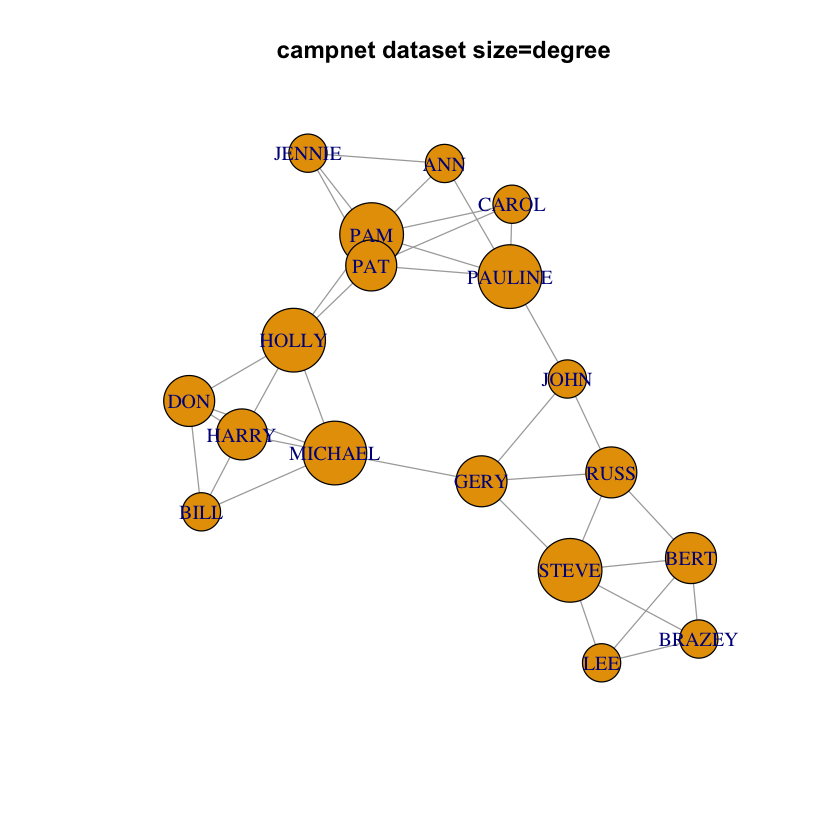

In [43]:
plot(g_undirected,
     edge.arrow.size = .4,
     layout = layout_with_kk,
     main = "campnet dataset size=degree",
     vertex.size = deg * 5)

## Eigenvector centrality

In [44]:
ev_g_un <- evcent(g_undirected)
print(ev_g_un)

$vector
    HOLLY    BRAZEY     CAROL       PAM       PAT    JENNIE   PAULINE       ANN 
1.0000000 0.2575818 0.5230920 0.7762326 0.6594487 0.4687665 0.6979279 0.4763429 
  MICHAEL      BILL       LEE       DON      JOHN     HARRY      GERY     STEVE 
0.9533345 0.6480174 0.2575818 0.8449127 0.4116208 0.8449127 0.5506573 0.4507376 
     BERT      RUSS 
0.3423158 0.4303505 

$value
[1] 4.078841

$options
$options$bmat
[1] "I"

$options$n
[1] 18

$options$which
[1] "LA"

$options$nev
[1] 1

$options$tol
[1] 0

$options$ncv
[1] 0

$options$ldv
[1] 0

$options$ishift
[1] 1

$options$maxiter
[1] 1000

$options$nb
[1] 1

$options$mode
[1] 1

$options$start
[1] 1

$options$sigma
[1] 0

$options$sigmai
[1] 0

$options$info
[1] 0

$options$iter
[1] 5

$options$nconv
[1] 1

$options$numop
[1] 29

$options$numopb
[1] 0

$options$numreo
[1] 22




HOLLY    BRAZEY     CAROL       PAM       PAT    JENNIE   PAULINE       ANN 
1.0000000 0.2575818 0.5230920 0.7762326 0.6594487 0.4687665 0.6979279 0.4763429 
  MICHAEL      BILL       LEE       DON      JOHN     HARRY      GERY     STEVE 
0.9533345 0.6480174 0.2575818 0.8449127 0.4116208 0.8449127 0.5506573 0.4507376 
     BERT      RUSS 
0.3423158 0.4303505

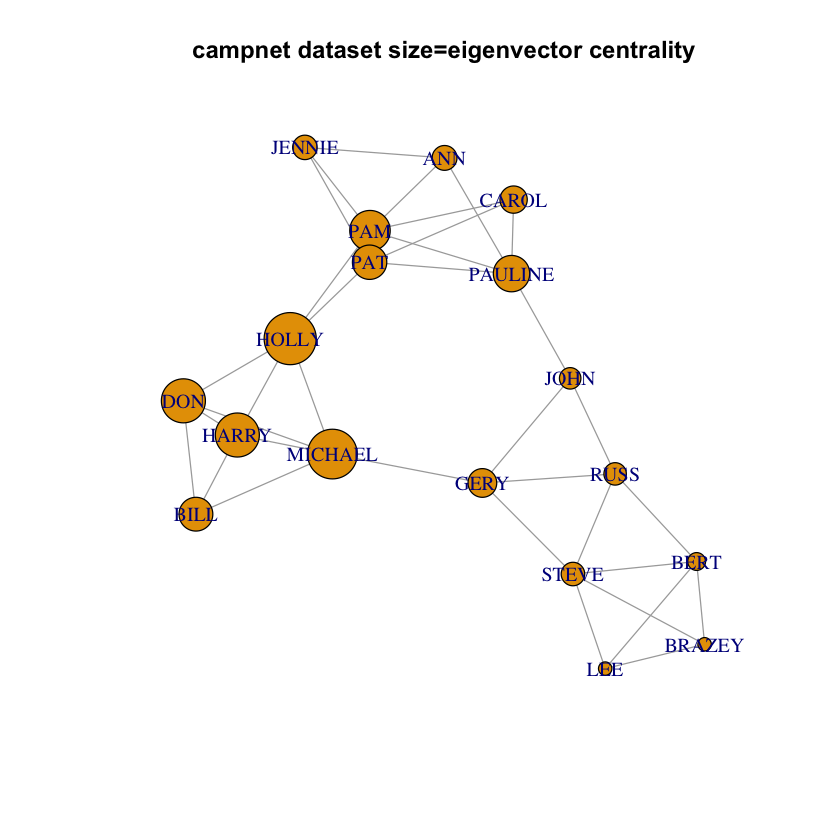

In [45]:
ev_g_un$vector
plot(g_undirected,
     layout = layout_with_kk,
     main = "campnet dataset size=eigenvector centrality",
     vertex.size =ev_g_un$vector * 20)

## Beta centrality or Bonacich power centrality

When b = 0 then this equals degree centrality

In [46]:
beta_centrality <- power_centrality(g_undirected, exponent = 0)
print(beta_centrality)

    HOLLY    BRAZEY     CAROL       PAM       PAT    JENNIE   PAULINE       ANN 
1.2587720 0.7552632 0.7552632 1.2587720 1.0070176 0.7552632 1.2587720 0.7552632 
  MICHAEL      BILL       LEE       DON      JOHN     HARRY      GERY     STEVE 
1.2587720 0.7552632 0.7552632 1.0070176 0.7552632 1.0070176 1.0070176 1.2587720 
     BERT      RUSS 
1.0070176 1.0070176 


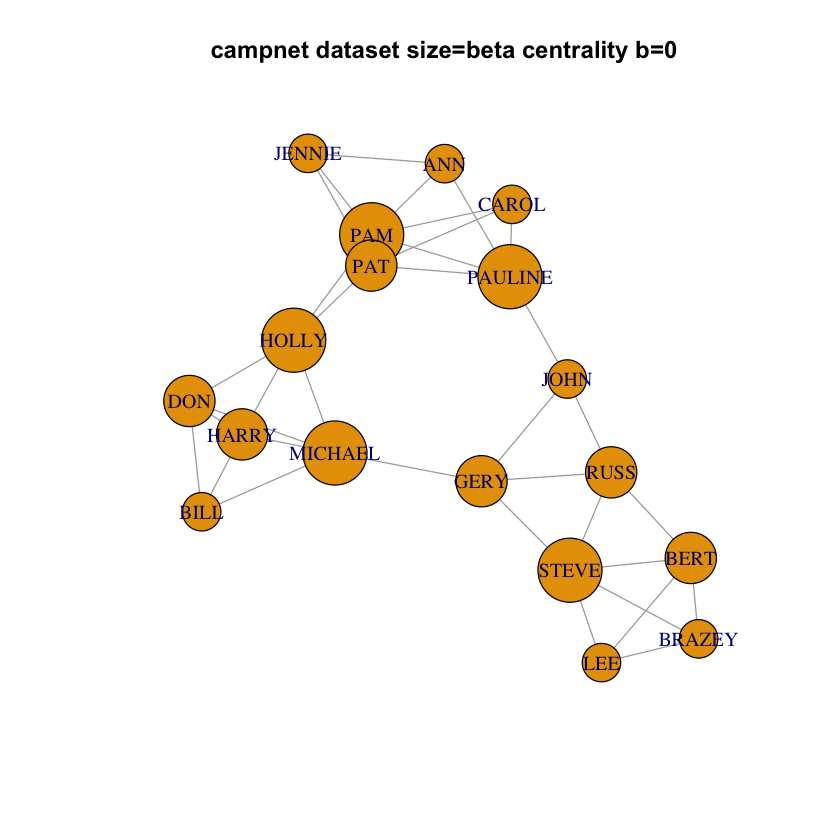

In [47]:
plot(g_undirected,
     layout = layout_with_kk,
     main = "campnet dataset size=beta centrality b=0",
     vertex.size = beta_centrality * 20)

We take a value of beta that approximates `1/largest eigenvalue`. The largest eigenvalue is given by the eigenvector centrality function evcent

In [48]:
# you can also calculate it
e <- eigen(g_matrix)

In [49]:
e$values

[1]  4.078841e+00  3.612768e+00  3.323262e+00  1.872646e+00  8.434542e-01
 [6]  4.550483e-01 -8.881784e-16 -1.478454e-01 -2.570428e-01 -8.630123e-01
[11] -1.000000e+00 -1.000000e+00 -1.000000e+00 -1.304000e+00 -1.698954e+00
[16] -1.936554e+00 -2.116148e+00 -2.862464e+00

In [50]:
max(e$values)

[1] 4.078841

In [51]:
1/max(e$values)

[1] 0.2451677

In [52]:
# with beta at its highest, beta centrality should approximate eigenvector centrality
beta_centrality <- power_centrality(g_undirected, exponent = 0.245)
print(beta_centrality)

    HOLLY    BRAZEY     CAROL       PAM       PAT    JENNIE   PAULINE       ANN 
1.5895977 0.4120202 0.8320411 1.2346034 1.0487711 0.7456173 1.1105185 0.7577684 
  MICHAEL      BILL       LEE       DON      JOHN     HARRY      GERY     STEVE 
1.5155865 1.0298128 0.4120202 1.3427690 0.6558899 1.3427690 0.8774641 0.7201598 
     BERT      RUSS 
0.5473423 0.6869261 


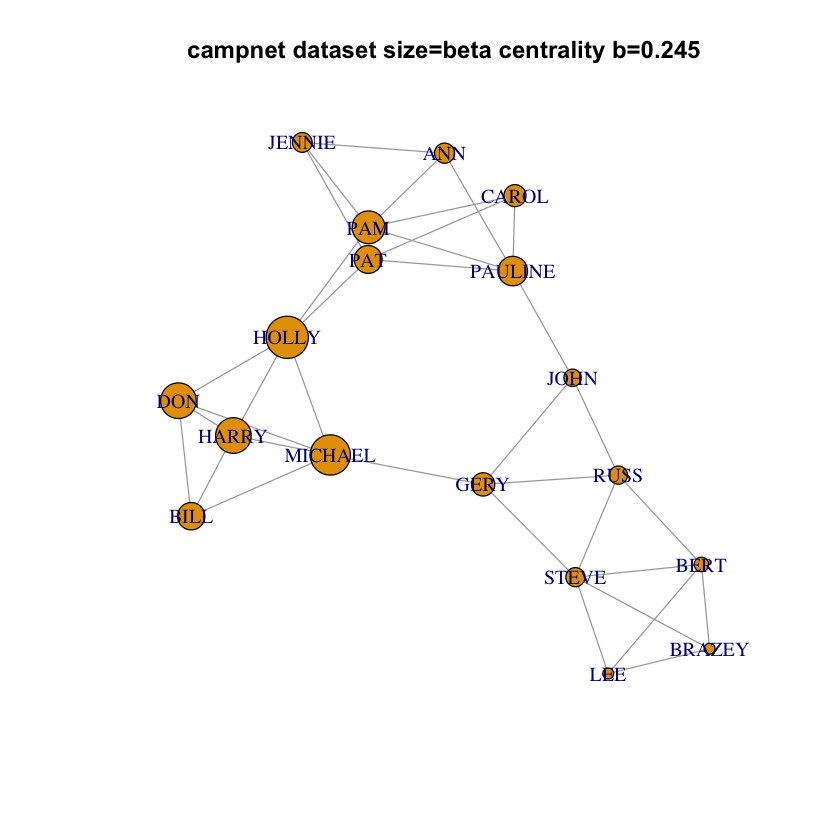

In [53]:
plot(g_undirected,
     layout = layout_with_kk,
     main = "campnet dataset size=beta centrality b=0.245",
     vertex.size = beta_centrality * 10)

## Closeness centrality

Closeness centrality measures how many steps is required to access every other vertex from a given vertex

In [54]:
closeness_g_un <- closeness(g_undirected, normalized = TRUE)
print(closeness_g_un)

    HOLLY    BRAZEY     CAROL       PAM       PAT    JENNIE   PAULINE       ANN 
0.4473684 0.2881356 0.3541667 0.4047619 0.3953488 0.3090909 0.4250000 0.3541667 
  MICHAEL      BILL       LEE       DON      JOHN     HARRY      GERY     STEVE 
0.4722222 0.3400000 0.2881356 0.3953488 0.4473684 0.3953488 0.4722222 0.3777778 
     BERT      RUSS 
0.3333333 0.4250000 


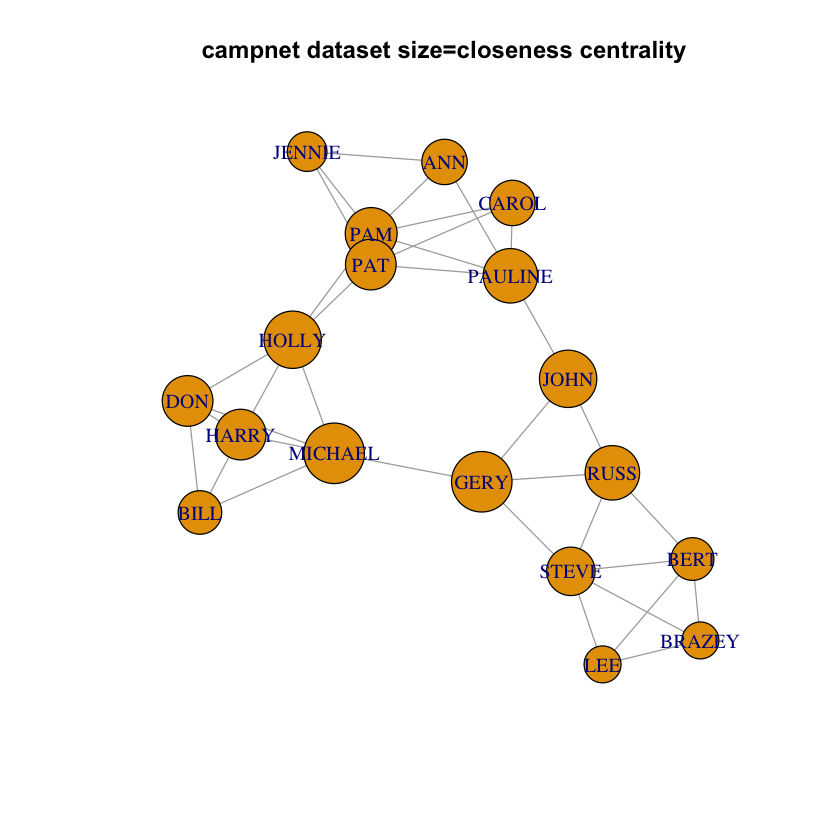

In [55]:
plot(g_undirected,
     layout = layout_with_kk,
     main = "campnet dataset size=closeness centrality",
     vertex.size = closeness_g_un * 50)

## Betweenness centrality

Betweenness centrality measures the number of shortest paths going through a specific vertex

In [56]:
betweenness_g_un <- betweenness(g_undirected)
print(betweenness_g_un)

    HOLLY    BRAZEY     CAROL       PAM       PAT    JENNIE   PAULINE       ANN 
27.454113  0.000000  0.250000 16.430844 10.930844  0.750000 33.236364  2.328788 
  MICHAEL      BILL       LEE       DON      JOHN     HARRY      GERY     STEVE 
33.442208  0.000000  0.000000  2.285714 32.795887  2.285714 39.343615 25.787879 
     BERT      RUSS 
 5.212121 21.465909 


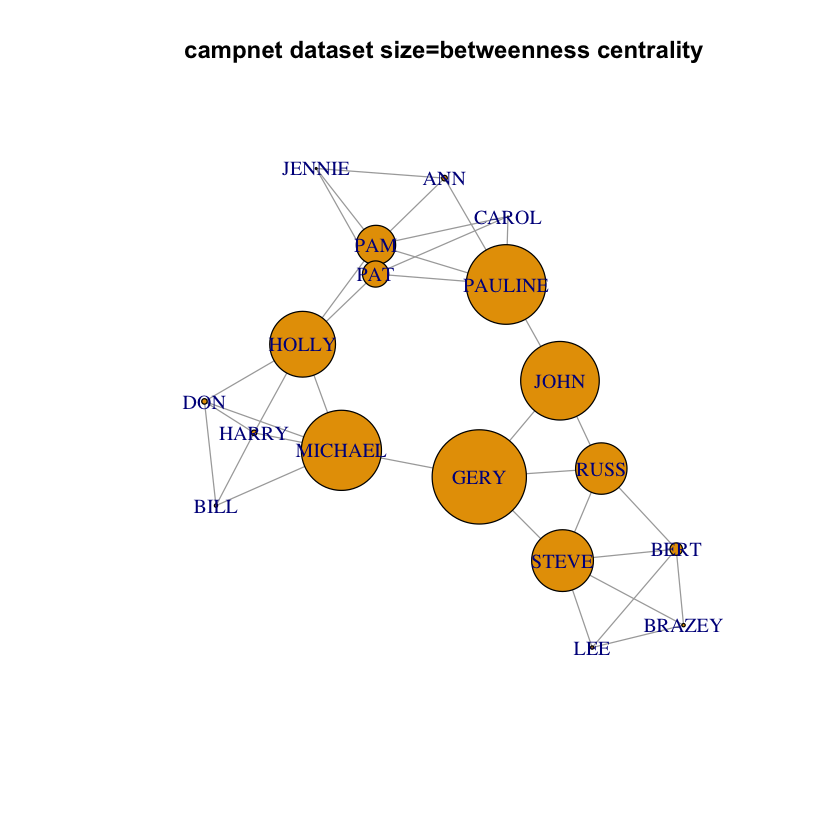

In [57]:
plot(g_undirected,
     layout = layout_with_kk,
     main = "campnet dataset size=betweenness centrality",
     vertex.size = betweenness_g_un)